<a href="https://colab.research.google.com/github/LordAguaKate/Pandas/blob/main/Seleccion_y_Agrupamiento_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

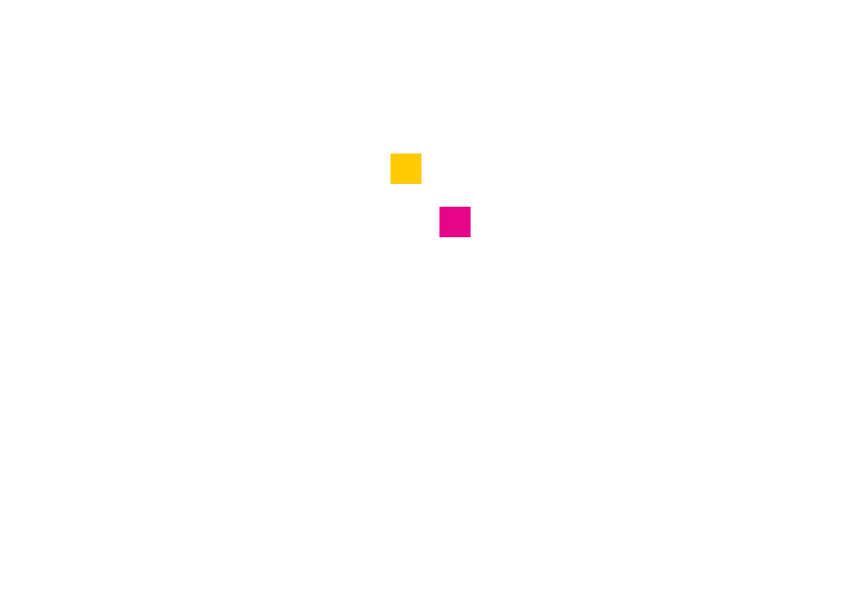

# **1. Conociendo los datos**

Analizaremos datos de emisiones de gases de efecto invernadero en Brasil y crearemos tablas y visualizaciones para comprender los datos y generar insights a partir de ellos. Los datos fueron extraídos del SEEG.

## Leyendo la base de datos

In [51]:
import pandas as pd

In [52]:
emisiones_gases = pd.read_excel('1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name = 'GEE Estados')

/home/LordAguaKate/Documentos/GitHub/Pandas/.venv/lib64/python3.14/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [53]:
emisiones_gases.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [54]:
emisiones_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

## Ajustando la base de datos

Solo nos interesan las emisiones de gases generados por los estados que están en el inventario nacional, por lo que identificaremos los tipos de datos únicos en la columna Emissao / Remoção / Bunker.

In [55]:
emisiones_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Primero, vamos a revisar los datos de remoción (eliminación), para identificar si todos ellos son de retirada de gases de efecto invernadero.

In [56]:
(emisiones_gases['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (emisiones_gases['Emissão / Remoção / Bunker'] == 'Remoção')

0         False
1         False
2         False
3         False
4         False
          ...  
103307    False
103308    False
103309    False
103310    False
103311    False
Name: Emissão / Remoção / Bunker, Length: 103312, dtype: bool

In [57]:
emisiones_gases[emisiones_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [58]:
emisiones_gases.loc[emisiones_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [59]:
emisiones_gases.loc[emisiones_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021].max()

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

In [60]:
emisiones_gases.loc[emisiones_gases['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado']

67365    NaN
67366    NaN
67367    NaN
67368    NaN
67369    NaN
67370    NaN
67371    NaN
67372    NaN
67373    NaN
67374    NaN
67375    NaN
67376    NaN
67377    NaN
67378    NaN
68503    NaN
68504    NaN
68505    NaN
68506    NaN
68507    NaN
68508    NaN
68509    NaN
68510    NaN
68511    NaN
68512    NaN
68513    NaN
68514    NaN
68515    NaN
68516    NaN
68909    NaN
68910    NaN
68911    NaN
68912    NaN
68913    NaN
68914    NaN
68915    NaN
68916    NaN
68917    NaN
68918    NaN
68919    NaN
68920    NaN
68921    NaN
68922    NaN
Name: Estado, dtype: object

In [61]:
emisiones_gases.loc[emisiones_gases['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique()

array([nan], dtype=object)

In [62]:
emision_gases = emisiones_gases[emisiones_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emisiones_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,8.976000e+02,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,1.300000e+02,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1.380576e+03,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,4.314300e+02,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,4.030000e+04,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103307,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,...,2731963.400,1091033.900,853275.300,1003731.400,1615000.600,1552258.800,216231.900,2805297.300,9.659261e+06,0.000
103308,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,...,2921341.000,1144504.000,896685.000,1074717.000,1763431.000,1706030.000,252599.000,3105007.000,1.053571e+07,0.000
103309,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,...,2950049.000,1151848.000,902209.000,1084073.000,1782863.000,1726958.000,257507.000,3147567.000,1.067568e+07,0.000
103310,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,...,2957780.000,1152868.000,902368.000,1084826.000,1784237.000,1729598.000,258068.000,3155415.000,1.072232e+07,0.000


In [63]:
emision_gases = emision_gases.drop(columns = 'Emissão / Remoção / Bunker')
emision_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


## Eliminando una columna


Para eliminar datos de un DataFrame, podemos usar el método drop(). Este métodos permite la eliminación tanto de filas como de columnas, utilizando los respectivos parámetros index y columns o del parámetro axis que indican los índices (filas) con valor 0 y columnas con valor 1.

Este método puede eliminar más de un elemento a la vez si se los pasa como una lista y, como resultado, genera una copia del DataFrame con las columnas eliminadas. El DataFrame original no se modifica y si deseas conservar los cambios debes almacenar la copia en la misma variable o usar el parámetro inplace=True. Es un método muy completo y útil.

Pero hay otra forma de eliminar datos con la biblioteca de pandas: pop(). No es tan completo como drop() y sólo es posible eliminar columnas del DataFrame y sólo una a la vez.

Además, a diferencia del método drop(), no es necesario asignar el DataFrame a la misma variable, porque pop() elimina la columna en el DataFrame original.

El código para utilizar el método pop() es el siguiente:



```
dataframe.pop(nombre_columna)
```

El método pop() también devuelve la columna que se está eliminando, por lo que si la columna se utiliza más adelante en algún análisis, es posible almacenarla en una variable en la misma línea de código:



```
columna_eliminada = dataframe.pop(nombre_columna)
```



# **2. Agrupamiento de los datos**

Modificando el formato del Dataframe

Para realizar las agrupaciones en los datos de emisiones, la base de datos debe estar en un formato adecuado, con los valores de emisiones todos en la misma columna. Para ello debemos modificar el formato de la base de datos para que las columnas referentes a cada año se conviertan en una única columna.

In [64]:
emision_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [65]:
columnas_info = list(emision_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns)
columnas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [66]:
emision_gases.loc[:,1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [67]:
columnas_emision = list(emision_gases.loc[:,1970:2021].columns)
columnas_emision

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Para realizar la transformación del DataFrame, utilizamos el método melt(). Este método tiene como objetivo transformar un DataFrame de un formato ancho (wide) a un formato largo (long).

In [68]:
emision_gases.melt(id_vars= columnas_info, value_vars= columnas_emision, var_name= 'Año', value_name= 'Emision')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [69]:
emisiones_por_año = emision_gases.melt(id_vars= columnas_info, value_vars= columnas_emision, var_name= 'Año', value_name= 'Emision')

Formato wide y long

Los datos de una tabla se pueden organizar en diferentes formatos según la forma en que fueron completados o la necesidad del análisis a realizar. Los términos wide y long son usados para describir la organización de los datos en una base de datos relacional.

En el formato wide, también conocidas como tablas dinámicas, las tablas tienen una única fila de encabezado que contiene varias columnas, generalmente más columnas que filas, y son útiles para almacenar informaciones que tienen muchos atributos, como cuestionarios y encuestas. Las columnas pueden contener valores faltantes para celdas donde los datos no se aplican.

Ejemplo de tabla en formato wide:

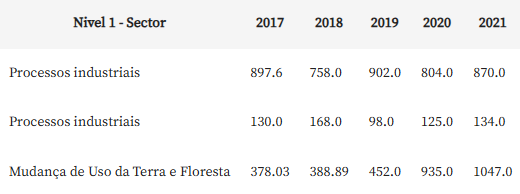

En el formato long, también conocido como formato normalizado o estrecho, las tablas almacenan cada observación en una fila separada. En lugar de tener una única fila de encabezado que contenga todas las columnas, las tablas en el formato long generalmente tienen dos columnas principales de información, una para los nombres de las variables y otra para los valores de las variables. Son útiles para almacenar informaciones con muchas observaciones, como series temporales o datos de experimentos científicos.

Ejemplo de una tabla en el formato long:

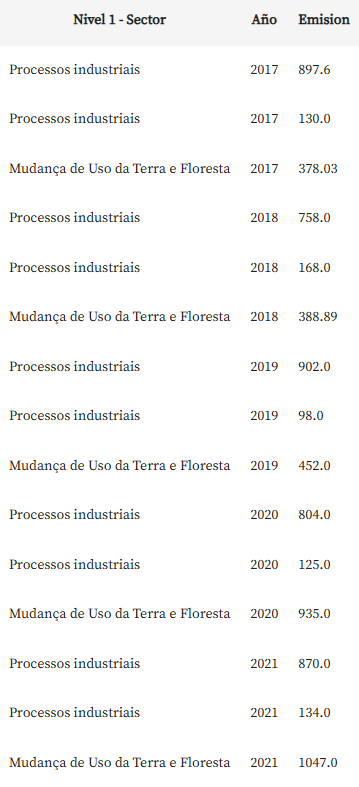

Con la biblioteca pandas, es posible cambiar el formato de wide para long usando el método melt(). La sintaxis para utilizar este método es la siguiente:

```
dataframe.melt(id_vars = [...], value_vars = [...], var_name = '..', value_name = '..')
```

El parámetro id_vars se utiliza para identificar los nombres de las columnas que se mantendrán en el momento de la transformación. El parámetro value_vars se utiliza para identificar las columnas que se transformarán en las columnas principales del formato long, una que contiene las categorías con los nombres de las columnas y la otra que contiene los valores. El parámetro var_name se utiliza para nombrar la columna que contiene las categorías y el parámetro value_name para nombrar la columna con los valores numéricos.

## Análisis de las emisiones

Vamos a realizar un análisis, pero esta vez, de la cantidad de la emisión total por tipo de gas. Para esto, vamos a realizar un agrupamiento de los datos con la función groupby().

In [70]:
emisiones_por_año.groupby('Gás')

In [71]:
emisiones_por_año.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [72]:
emisiones_por_año.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


Los métodos de agregación posibles con la utilización de groupby() son los siguientes:

* count() para realizar el conteo

* sum() para la suma

* mean() para el promedio

* median() para la mediana

* min() para el valor mínimo

* max() para el valor máximo

* std() para la desviación estándar

* var() para la varianza

In [73]:
emisiones_por_año.groupby('Gás').sum(numeric_only= True)

,Emision
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [74]:
emisiones_por_gas = emisiones_por_año.groupby('Gás').sum(numeric_only= True).sort_values(by= 'Emision', ascending= False)
emisiones_por_gas

,Emision
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


<Axes: ylabel='Gás'>

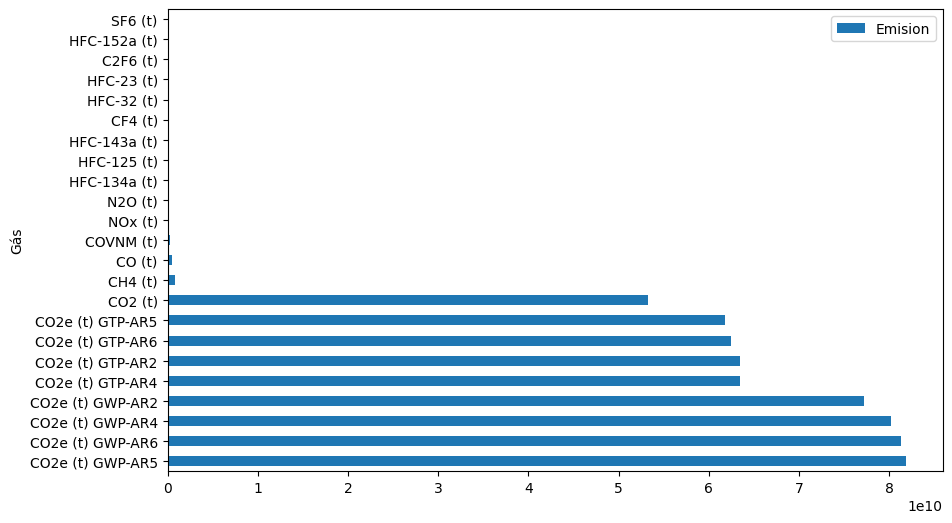

In [75]:
emisiones_por_gas.plot(kind = 'barh', figsize = (10,6))

In [76]:
emisiones_por_gas.iloc[0:9]

,Emision
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [77]:
float(emisiones_por_gas.iloc[0:9].sum() / emisiones_por_gas.sum()) * 100

/tmp/ipykernel_12595/2575520459.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(emisiones_por_gas.iloc[0:9].sum() / emisiones_por_gas.sum()) * 100


99.73625255007093

In [78]:
print(f'Las emisiones de CO2 corresponden al {(emisiones_por_gas.iloc[0:9].sum() / emisiones_por_gas.sum()).iloc[0] * 100:.2f}% de las emisiones totales de gases de efecto invernadero en Brasil.')

Las emisiones de CO2 corresponden al 99.74% de las emisiones totales de gases de efecto invernadero en Brasil.


# Cómo funciona groupby

La agrupación de datos es una aplicación ampliamente utilizada para encontrar medidas resumidas y obtener una mayor comprensión de los datos. Con la biblioteca pandas es posible utilizar el método groupby, que es un proceso que ocurre a través de diferentes pasos conocidos como split-apply-combine o dividir, aplicar y combinar, en español.

El paso "dividir" consiste básicamente en separar el conjunto de datos en diferentes tablas, una para cada grupo. Los grupos se generan a partir de categorías en una o más columnas de la tabla en función de la información que queremos agrupar. En este paso podemos ver los grupos formados con el atributo groups y visualizar los datos de un grupo específico usando el método get_group().

La etapa "aplicar" se refiere al momento de utilizar una función matemática sobre los datos de cada grupo por separado. Si el deseo es encontrar el valor total de cada grupo, entonces la suma se aplicará a cada grupo; si queremos el valor promedio, se aplicará la función promedio a cada grupo, y así sucesivamente. Hay varias funciones que se pueden aplicar y cada una dependerá del objetivo del análisis de datos:

* media(): calcula la media de los grupos
* suma(): calcula la suma de los valores del grupo
* size() : calcula el tamaño del grupo
* count(): calcula el conteo del grupo
* std(): desviación estándar de grupos
* var(): calcula la variación de grupos
* sem(): error estándar de la media del grupo
* describe(): genera estadísticas descriptivas
* first() : calcula el primero de los valores del grupo
* last(): calcula el último de los valores del grupo
* nth(): obtiene el enésimo valor del grupo
* min(): calcula el número mínimo de valores en el grupo
* max(): calcula el número máximo de valores en el grupo


Finalmente, el paso "combinar" consiste en reunir todas las informaciones de agregación de cada grupo en una sola tabla, que contiene un resumen de la información. A partir de ahí y con el resultado final, es posible extraer insights de los datos y realizar comparaciones de los resultados entre cada grupo.

# **3. Agrupamientos multi-index**

## Emisión de gases por sector

Ahora necesitamos encontrar dos informaciones:

* Descubrir cuáles son los sectores más contaminantes por cada gas;

* Descubrir cuáles son los gases más contaminantes por cada sector.

In [79]:
gas_por_sector = emisiones_por_año.groupby(['Gás', 'Nível 1 - Setor']).sum(numeric_only= True)
gas_por_sector

Emision
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

Para descubrir el sector que emite mayor cantidad de CO2, podemos realizar una selección específica del gas CO2 mediante el método cross-section xs(), extrayendo de esto el valor máximo y el índice máximo con los métodos max() e idxmax().

In [80]:
gas_por_sector.xs('CO2 (t)', level= 0)

,Emision
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [81]:
gas_por_sector.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level= [0,1])

,,Emision
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [82]:
gas_por_sector.xs('CO2 (t)', level= 0).max()

Emision    3.733930e+10
dtype: float64

In [83]:
gas_por_sector.xs('CO2 (t)', level= 0).idxmax()

Emision    Mudança de Uso da Terra e Floresta
dtype: object

Un DataFrame Multi-index es una estructura de datos en pandas que permite la creación de un índice jerárquico, es decir, con un índice que tiene múltiples niveles. Esto permite organizar los datos de una manera más detallada que un índice simple y se puede ver en el siguiente ejemplo de un DataFrame Multi-index, en el que las dos primeras columnas representan los 2 niveles del índice:

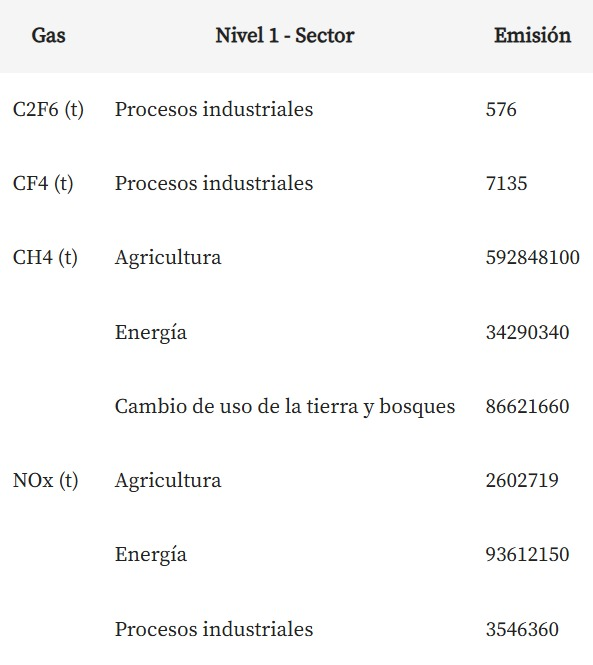

La jerarquía de los índices es de izquierda a derecha, por lo tanto el índice "Gas" ocupa el nivel de jerarquía 0 y el índice "Nivel 1 - Sector" ocupa el nivel de jerarquía 1. La selección de los datos a partir de los índices en este tipo de DataFrame se vuelve un poco diferente a uno convencional. Podemos utilizar el método loc para seleccionar los datos del primer level directamente. Luego, para seleccionar la información del gas "CH4", se puede utilizar el código:

```datos.loc['CH4 (t)']```

También se puede especificar valores para todos los niveles de índice pasando una tupla al método loc. Para seleccionar la emisión de "Agricultura" del gas "CH4", podemos utilizar la tupla ('CH4(t)', 'Agricultura'), manteniendo el orden de los niveles:

```datos.loc[('CH4 (t)', 'Agricultura')]```

Ahora, para seleccionar valores específicos de cualquiera de los niveles del índice, es necesario utilizar el método xs(), conocido como cross-section. Con él existe la posibilidad de seleccionar un valor de un nivel de jerarquía sin necesidad de indicar la tupla del primer level. Para seleccionar los valores "Agricultura" en la tabla, podemos usar el código:

```datos.xs('Agricultura', level = 1)```

Para evitar un método manual para cada tipo de gas, podemos explorar más a fondo el método groupby() combinado con idxmax().

In [84]:
gas_por_sector.groupby(level=0).idxmax()

,Emision
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


In [85]:
valores_max = gas_por_sector.groupby(level=0).max().values

In [86]:
tablas_totalizada = gas_por_sector.groupby(level=0).idxmax()
tablas_totalizada.insert(1, 'Cantidad de emisión', valores_max)
tablas_totalizada

,Emision,Cantidad de emisión
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


Podemos cambiar el orden de los niveles del índice para encontrar la otra información, que nos dice cuál es el gas más emitido para cada tipo de sector. Para ello utilizaremos el método swaplevel().

In [87]:
gas_por_sector.swaplevel(0, 1)

Emision
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [88]:
gas_por_sector.swaplevel(0, 1).groupby(level=0).idxmax()


,Emision
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


## Emisión a lo largo de los años

Identifiquemos si las emisiones de gases de efecto invernadero han aumentado o disminuido a lo largo de los años y visualizaremos esta variación para cada tipo de gas emitido por separado.

In [89]:
emisiones_por_año

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


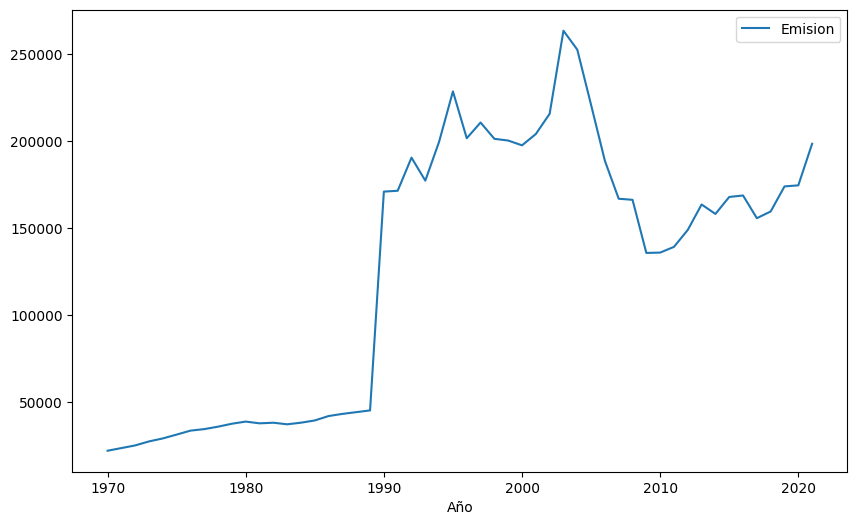

In [90]:
emisiones_por_año.groupby('Año').mean(numeric_only=True).plot(figsize= (10,6));

In [91]:
emisiones_por_año.groupby('Año').mean(numeric_only=True).idxmax()

Emision    2003
dtype: int64

In [92]:
emisiones_por_año.groupby(['Año', 'Gás']).mean(numeric_only=True)

Emision
Año  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [93]:
promedio_emision_anual = emisiones_por_año.groupby(['Año', 'Gás']).mean(numeric_only=True).reset_index()
promedio_emision_anual

,Año,Gás,Emision
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [94]:
promedio_emision_anual = promedio_emision_anual.pivot_table(index= 'Año', columns= 'Gás', values= 'Emision')
promedio_emision_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Año,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


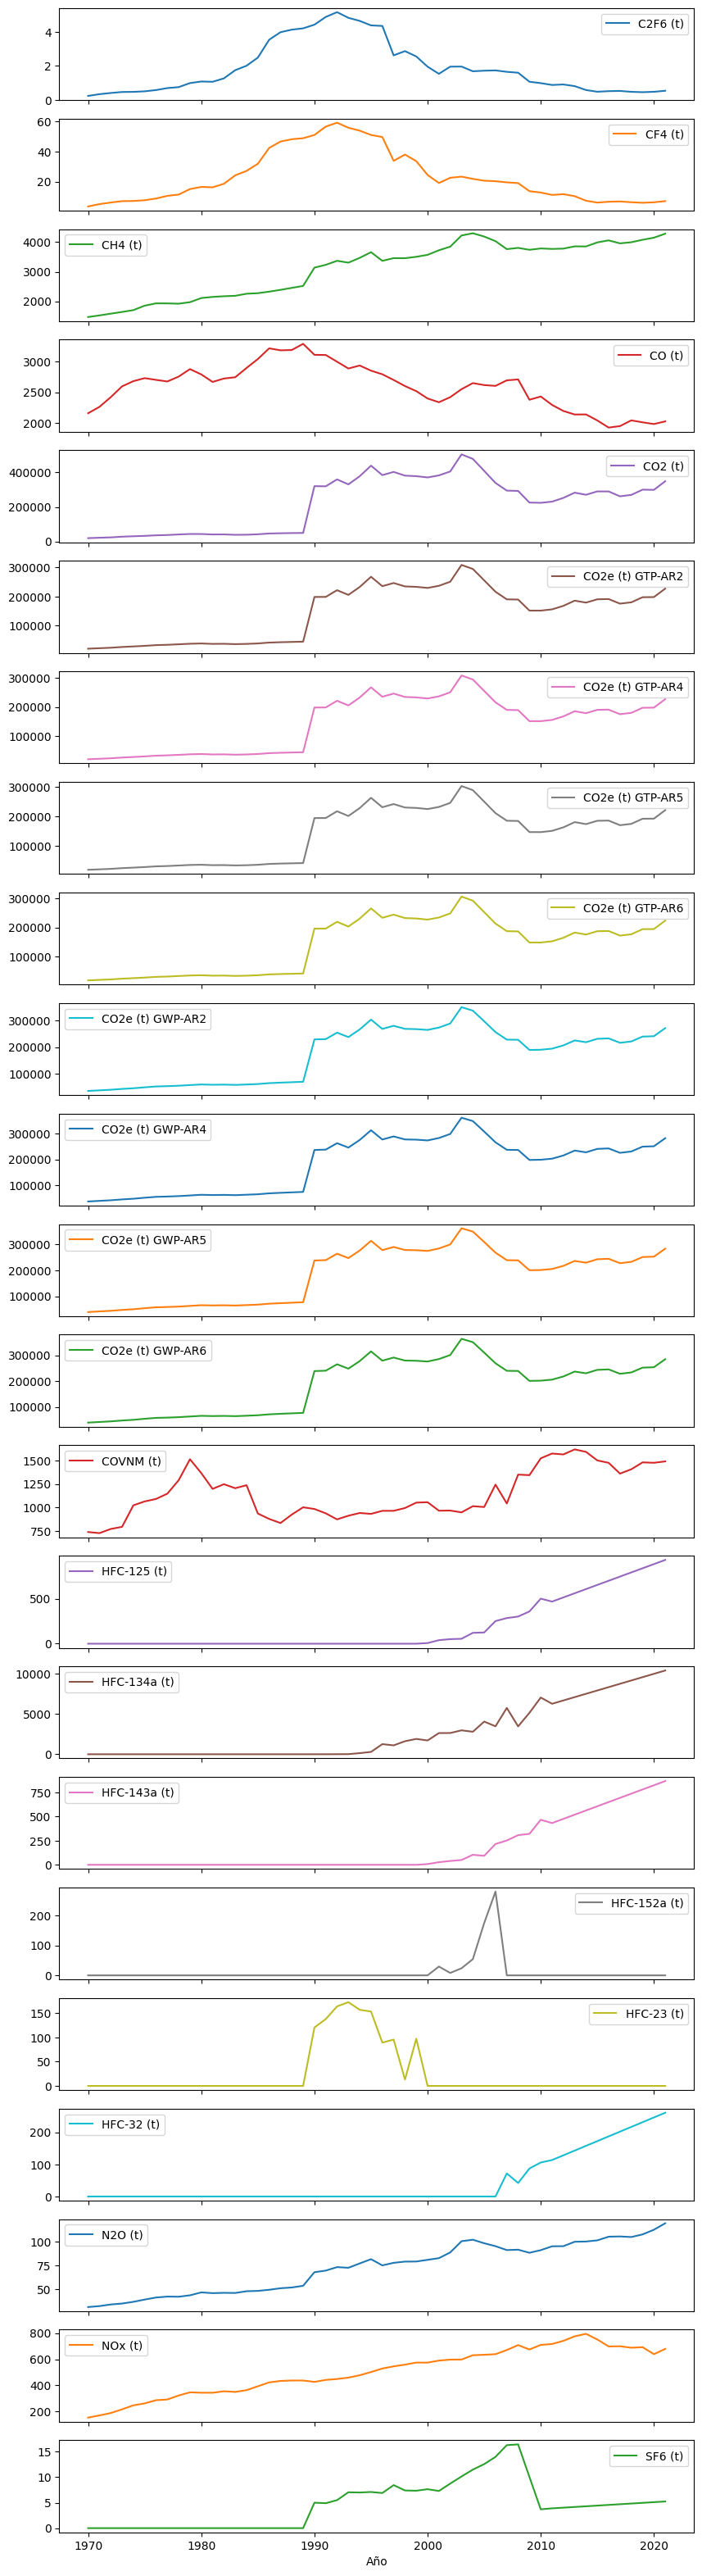

In [95]:
promedio_emision_anual.plot(subplots= True, figsize= (10,40));

# **4. Uniendo los datos**

Población de los estados

Importaremos una nueva base de datos con información de la población de cada estado de Brasil, para luego encontrar la emisión per cápita de cada estado.

* Los datos se obtuvieron a través de censo del IBGE

In [96]:
poblacion_estados = pd.read_excel('POP2022_Municipios.xls', header=1, skipfooter=34)
poblacion_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


Como la información se refiere a municipios, realizaremos una agregación basada en la columna estado

In [97]:
poblacion_estados.groupby('UF').sum(numeric_only= True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


In [98]:
poblacion_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UF                 5570 non-null   object
 1   COD. UF            5570 non-null   int64 
 2   COD. MUNIC         5570 non-null   int64 
 3   NOME DO MUNICÍPIO  5570 non-null   object
 4   POPULAÇÃO          5570 non-null   object
dtypes: int64(2), object(3)
memory usage: 217.7+ KB


Notamos que la información no estaba agregada, por lo que será necesario realizar algún tratamiento en esta columna para devolver los datos correctamente 

In [99]:
#poblacion_estados['POPULAÇÃO'].astype(int)

In [100]:
poblacion_estados[poblacion_estados['POPULAÇÃO'].str.contains('\(', na= False)]

<>:1: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
<>:1: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
/tmp/ipykernel_12595/2355400217.py:1: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
  poblacion_estados[poblacion_estados['POPULAÇÃO'].str.contains('\(', na= False)]


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [101]:
poblacion_estados = poblacion_estados.assign(poblacion_sin_parentesis = poblacion_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex= True),
                         poblacion = lambda x: x.loc[:, 'poblacion_sin_parentesis'].replace('\.', '', regex=True))

<>:1: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
<>:2: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
<>:1: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
<>:2: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
/tmp/ipykernel_12595/863554485.py:1: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
  poblacion_estados = poblacion_estados.assign(poblacion_sin_parentesis = poblacion_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex= True),
/tmp/ipykernel_12595/863554485.py:2: SyntaxWarning: "\." i

In [102]:
poblacion_estados[poblacion_estados['POPULAÇÃO'].str.contains('\(', na= False)]

<>:1: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
<>:1: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
/tmp/ipykernel_12595/2355400217.py:1: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
  poblacion_estados[poblacion_estados['POPULAÇÃO'].str.contains('\(', na= False)]


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,poblacion_sin_parentesis,poblacion
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [103]:
poblacion_estados = poblacion_estados.astype({'poblacion': 'int64'})

In [104]:
poblacion_estados = poblacion_estados.groupby('UF')[['poblacion']].sum().reset_index()
poblacion_estados

,UF,poblacion
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


Con la información procesada podemos unir los datos de emeisiones con los datos de la población, utilizando el método merge()

In [105]:
emisiones_estados = emisiones_por_año[emisiones_por_año['Año'] == 2021].groupby('Estado')[['Emision']].sum().reset_index()
emisiones_estados

,Estado,Emision
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


In [106]:
datos_agrupados = pd.merge(emisiones_estados, poblacion_estados, left_on= 'Estado', right_on= 'UF')
datos_agrupados

,Estado,Emision,UF,poblacion
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


Comprobemos si hay algún indicio de si las emisiones aumentan con el tamaño de la población

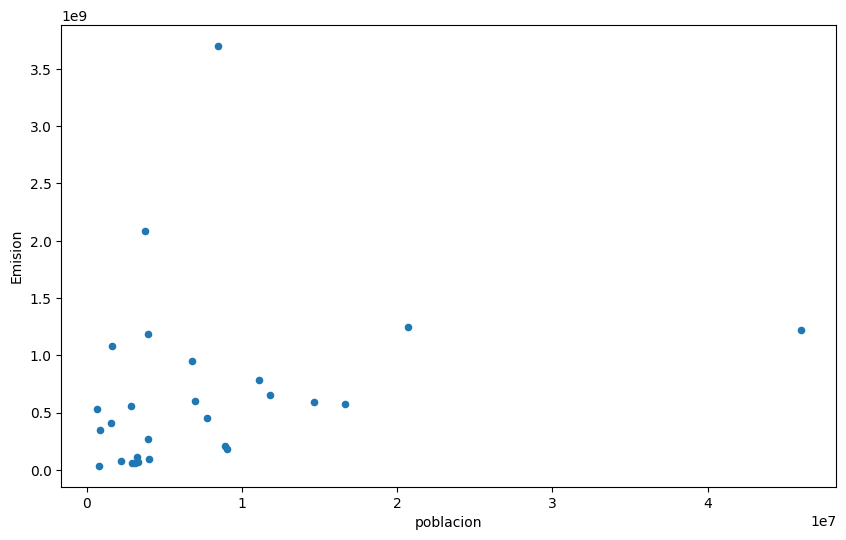

In [107]:
datos_agrupados.plot(x= 'poblacion', y= 'Emision', kind= 'scatter', figsize= (10,6));

Si queremos conocer la información de cada estado en los puntos del gráfico, podemos utilizar otra biblioteca para obtener un gráfico más elaborado.

In [108]:
import plotly.express as px

In [109]:
px.scatter(data_frame = datos_agrupados, x = 'poblacion', y = 'Emision', text= 'Estado', opacity=0)

Para obtener las emisiones per cápita crearemos una nueva columna dividiendo los valores de emisión por la población de cada estado.

In [110]:
datos_agrupados

,Estado,Emision,UF,poblacion
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


In [111]:
datos_agrupados = datos_agrupados.assign(emision_per_capita = datos_agrupados['Emision'] / datos_agrupados['poblacion']).sort_values(by= 'emision_per_capita', ascending= False)
datos_agrupados

,Estado,Emision,UF,poblacion,emision_per_capita
21,RR,5.282071e+08,RR,634805,832.077694
20,RO,1.083515e+09,RO,1616379,670.334662
12,MT,2.081610e+09,MT,3784239,550.073647
13,PA,3.701684e+09,PA,8442962,438.434230
0,AC,3.505471e+08,AC,829780,422.457928
2,AM,1.189649e+09,AM,3952262,301.004463
26,TO,4.082159e+08,TO,1584306,257.662300
11,MS,5.551278e+08,MS,2833742,195.899220
9,MA,9.476324e+08,MA,6800605,139.345312
8,GO,6.008081e+08,GO,6950976,86.435075


In [113]:
px.bar(data_frame = datos_agrupados, x= 'Estado', y= 'emision_per_capita',)

In [114]:
px.scatter(data_frame = datos_agrupados, x = 'poblacion', y = 'Emision', text= 'Estado', size= 'emision_per_capita')